<a href="https://colab.research.google.com/github/LiLSushiVert/Adult_Income_Dataset_EDA/blob/main/Adult_Income_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
adult = fetch_openml (name='adult', version =1, as_frame = True)
ds = adult.frame

In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  category
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capitalgain     48842 non-null  category
 11  capitalloss     48842 non-null  category
 12  hoursperweek    48842 non-null  category
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(13), int64(2)
memory usage: 1.4 MB


In [ ]:
num_rows = ds.shape[0]
num_cols = ds.shape[1]

print(f"Total number of records: {num_rows}")
print(f"Total number of features: {num_cols}")

print(ds.head())

Total number of records: 48842
Total number of features: 15
  age         workclass  fnlwgt  education  education-num      marital-status  \
0   2         State-gov   77516  Bachelors             13       Never-married   
1   3  Self-emp-not-inc   83311  Bachelors             13  Married-civ-spouse   
2   2           Private  215646    HS-grad              9            Divorced   
3   3           Private  234721       11th              7  Married-civ-spouse   
4   1           Private  338409  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex capitalgain capitalloss  \
0       Adm-clerical  Not-in-family  White    Male           1           0   
1    Exec-managerial        Husband  White    Male           0           0   
2  Handlers-cleaners  Not-in-family  White    Male           0           0   
3  Handlers-cleaners        Husband  Black    Male           0           0   
4     Prof-specialty           Wife  Black  Female           0 

In [ ]:
numeric_features = ds.select_dtypes(include=['number']).columns
min_values = ds[numeric_features].min()
max_values = ds[numeric_features].max()

print("Minimum values for numeric features:")
print(min_values)
print("\nMaximum values for numeric features:")
print(max_values)


Minimum values for numeric features:
fnlwgt           12285
education-num        1
dtype: int64

Maximum values for numeric features:
fnlwgt           1490400
education-num         16
dtype: int64


In [ ]:
missing_values = ds.isnull().sum()

print("\nNumber of missing values in each column:")
print(missing_values)


Number of missing values in each column:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64


the dataset contains numeric and categorical features. Numeric columns have varying ranges, categorical features represent different categories of groups

In [ ]:
for col in ['workclass', 'occupation', 'native-country']:
    ds[col] = ds[col].fillna(ds[col].mode()[0])


This approach replaces missing values in numeric features with the mode because it preserves the most common category and maintains consistency in the data.

In [ ]:
def convert_target_to_binary(value):
  """Converts '<=50K' to 0 and '>50K' to 1."""
  if value == '<=50K':
    return 0
  elif value == '>50K':
    return 1
  else:
    return value

In [ ]:
def convert_sex_to_binary(value):
  """Converts 'Male' to 1 and 'Female' to 0."""
  if value == 'Male':
    return 1
  elif value == 'Female':
    return 0
  else:
    return value

In [ ]:
ds['class'] = ds['class'].apply(convert_target_to_binary)

ds['sex_binary'] = ds['sex'].apply(convert_sex_to_binary)

In [ ]:
class_distribution = ds['class'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
class
0    37155
1    11687
Name: count, dtype: int64


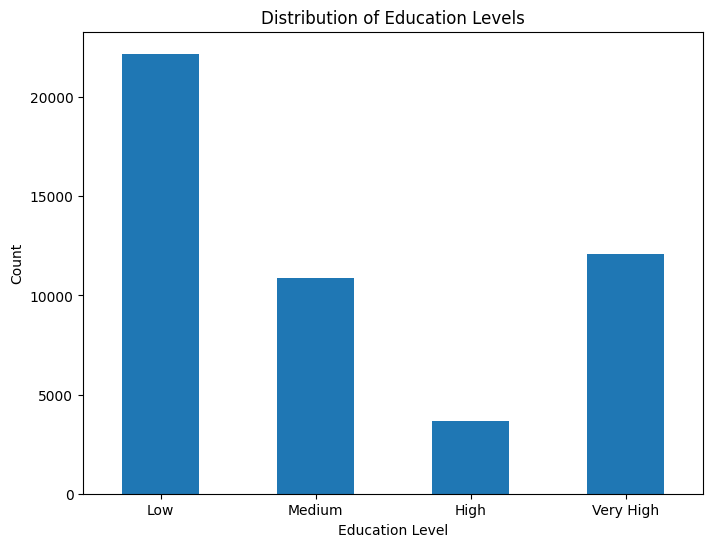

Mean Education-Num: 10.078088530363212
Median Education-Num: 10.0
Mode Education-Num: 9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bins = ds['education-num'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Low', 'Medium', 'High', 'Very High']
ds['education_binned'] = pd.cut(ds['education-num'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
ds['education_binned'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

mean_edu = ds['education-num'].mean()
median_edu = ds['education-num'].median()
mode_edu = ds['education-num'].mode()[0]

print(f"Mean Education-Num: {mean_edu}")
print(f"Median Education-Num: {median_edu}")
print(f"Mode Education-Num: {mode_edu}")

Features strongly correlated with income_binary:
 age              0.248931
education-num    0.332613
hoursperweek     0.238716
income_binary    1.000000
sex_binary       0.214628
Name: income_binary, dtype: float64


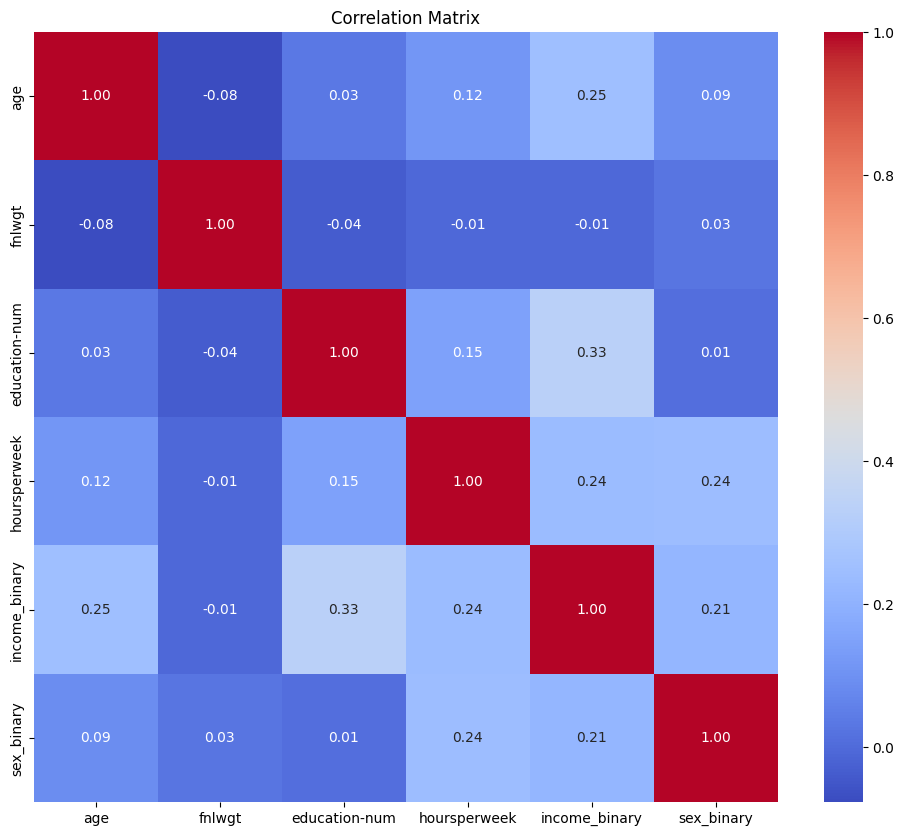

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ds['income_binary'] = pd.to_numeric(ds['income_binary'])
ds['sex_binary'] = pd.to_numeric(ds['sex_binary'])

numeric_features = ds.select_dtypes(include=['number']).columns

correlation_matrix = ds[numeric_features].corr()
strong_corr_features = correlation_matrix[abs(correlation_matrix['income_binary']) > 0.2]['income_binary']
print("Features strongly correlated with income_binary:\n", strong_corr_features)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

'education-num' has a moderate positive correlation with 'income_binary'. This would indicate that individuals with higher education levels are more likely to have higher incomes.

'sex_binary' this suggests men are slightly more likely to have higher income. But is a weak positive correlation

'hoursperweek' suggest that the more time they work, the higher income they have

other columns have negligible or no meaningful correlation


In [ ]:
import pandas as pd

education_num_group_counts = ds.groupby('education-num')['education-num'].count()

print("Number of records grouped by education-num:")
print(education_num_group_counts)

Number of records grouped by education-num:
education-num
1        83
2       247
3       509
4       955
5       756
6      1389
7      1812
8       657
9     15784
10    10878
11     2061
12     1601
13     8025
14     2657
15      834
16      594
Name: education-num, dtype: int64


. Each row represents a unique education number, and the value in the second column indicates the number of individuals with that specific education number
Most Frequent Education Numbers: The education numbers 9 and 10 have the highest frequencies (15784 and 10878 respectively), indicating that a significant portion of individuals in the dataset have these education levels.
Least Frequent Education Numbers: The education number 1 has the lowest frequency (83), suggesting that very few individuals have this education level
Distribution: The distribution is skewed towards higher education numbers, with a large number of individuals having education numbers 9, 10, and 13.

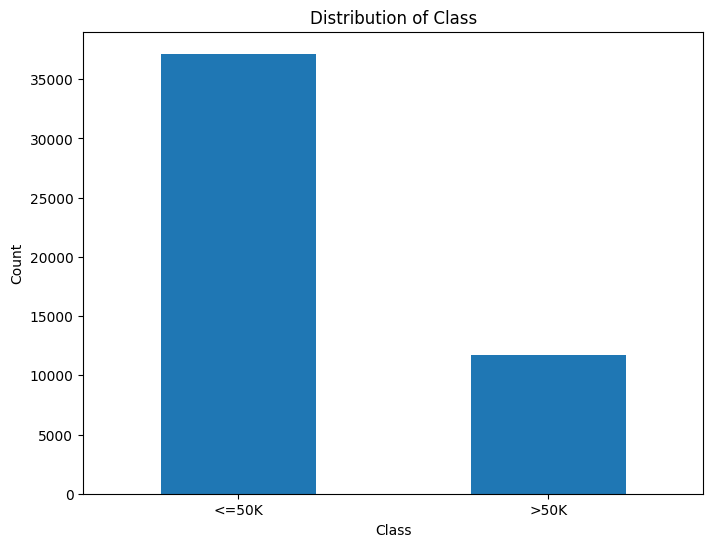

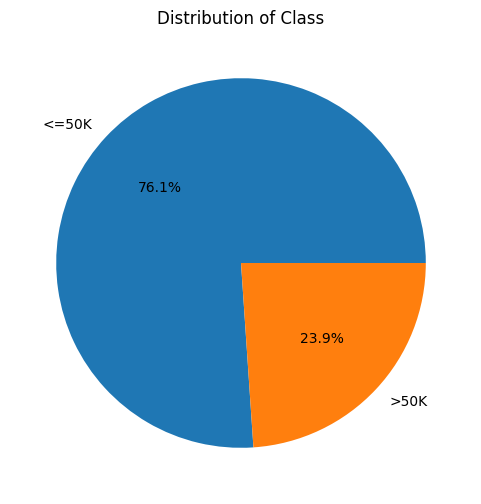

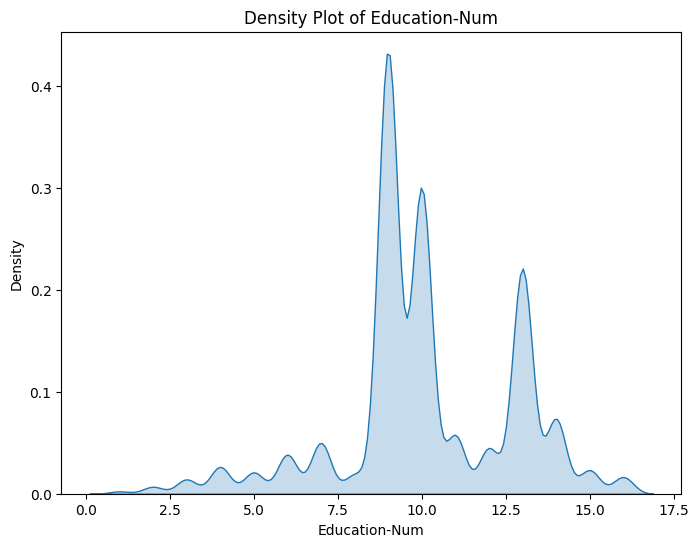

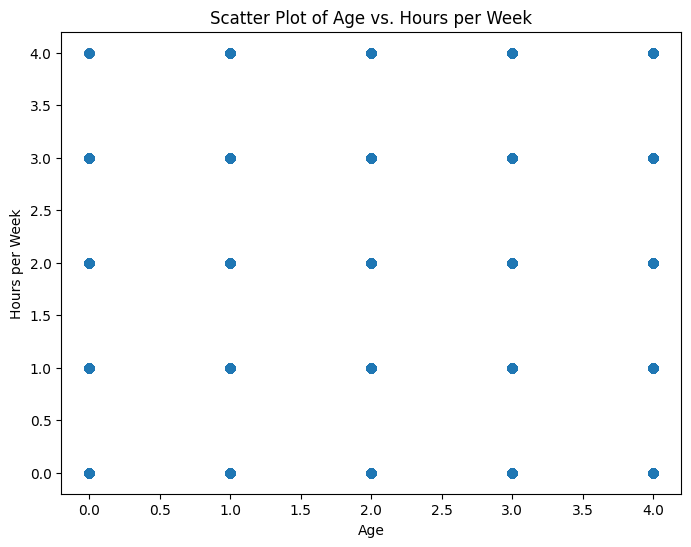

In [ ]:
plt.figure(figsize=(8, 6))
ds['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6, 6))
ds['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Class')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(ds['education-num'], fill=True)
plt.title('Density Plot of Education-Num')
plt.xlabel('Education-Num')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(8, 6))
ds['age'] = pd.to_numeric(ds['age'])
ds['hoursperweek'] = pd.to_numeric(ds['hoursperweek'])
plt.scatter(ds['age'], ds['hoursperweek'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

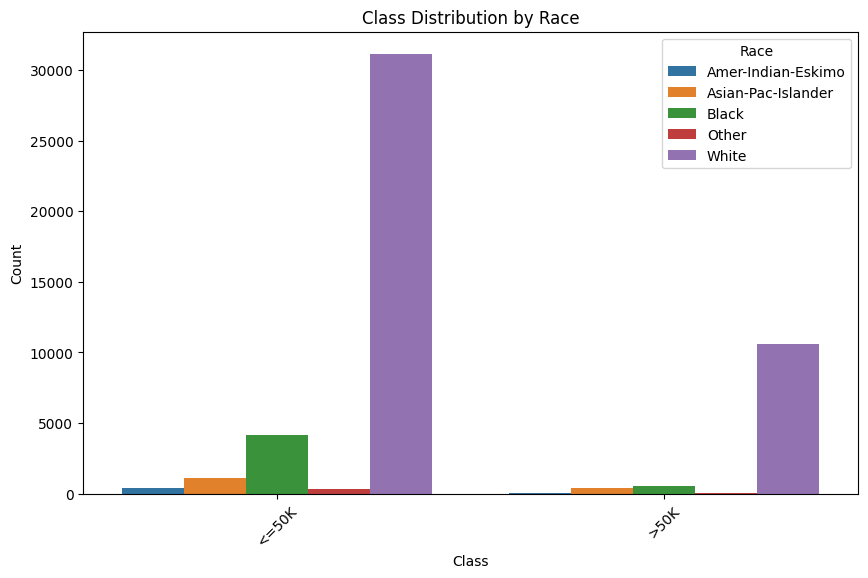

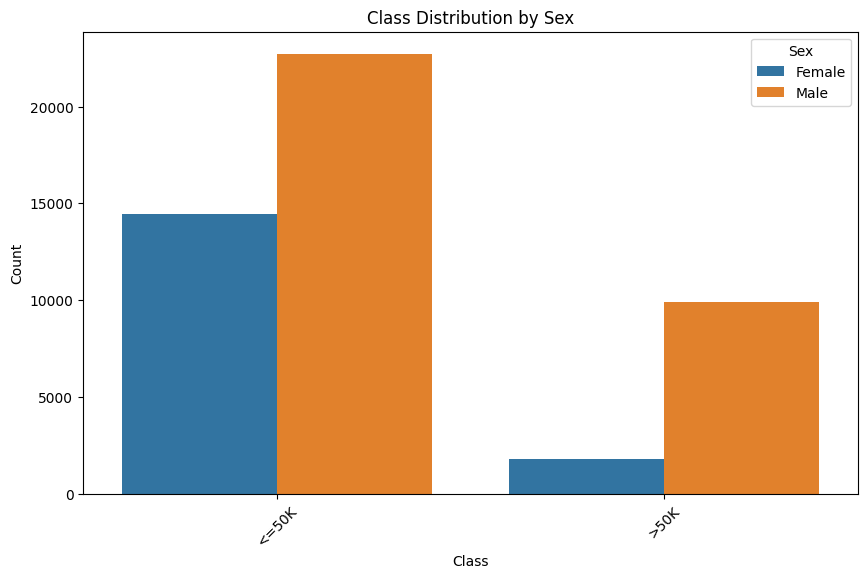

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='race', data=ds)
plt.title('Class Distribution by Race')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='sex', data=ds)
plt.title('Class Distribution by Sex')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

chart 1:
Whites (Whites) dominate both income groups, especially the upper income group.

The Asian-Pac-Islander and Black groups are much smaller, but the Black group has a higher proportion of >50K than the Asian-Pac-Islander group.

The Amer-Indian-Eskimo and Other groups have very small proportions in both income group.

 Conclusion: There is a disparity in income between ethnic groups. Whites have a higher chance of achieving higher incomes, while minorities have significantly lower proportions.

chart 2:
The income level >50K is mainly male.

Females account for a significantly lower proportion in the high-income group and relative lower in the other income.

Conclusion: There is a significant difference in income by gender, which reflects gender inequality in income